# Basic Time Series Models - Lab

## Introduction

Now that you have some basic understanding of the white noise and random walk models, its time for you to implement them! 

## Objectives

In this lab you will: 

- Generate and analyze a white noise model 
- Generate and analyze a random walk model 
- Implement differencing in a random walk model 


## A White Noise model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September, and October of 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day 
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes  
- Create and visualize a time series that reflects this information 

Let's import `pandas`, `numpy`, and `matplotlib.pyplot` using their standard alias. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Do not change this seed
np.random.seed(12) 

Create the dates. You can do this using the `date_range()` function Pandas. More info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [2]:
# Create dates: Every day in August, September, and October of 2018, 
# ignore weekends for now and assume that Nina works every day
dates = pd.date_range(start='2018-08-01', end='2018-10-31')

len(dates) 

92

In [3]:
# from SB length should equal 65, clearly not ignoring weekends but ok
# use Offset alias "B" for business day frequency
dates = pd.date_range(start='2018-08-01', end='2018-10-31', freq="B")

len(dates) 

66

In [4]:
# not sure why I'm getting 66, I will add `closed` param to exclude the end boundary
dates = pd.date_range(start='2018-08-01', end='2018-10-31', freq="B", closed='left')

len(dates)

65

Generate the values for the white noise process representing Nina's commute in August and September.

In [5]:
# Generate values for white noise
commute = np.random.normal(25,4,len(dates))

Create a time series with the dates and the commute times.

In [6]:
# Create a time series
commute_series = pd.Series(commute, index=dates)
commute_series

2018-08-01    26.891943
2018-08-02    22.274296
2018-08-03    25.969758
2018-08-06    18.197057
2018-08-07    28.012571
                ...    
2018-10-24    28.774302
2018-10-25    26.430577
2018-10-26    24.666203
2018-10-29    27.711224
2018-10-30    27.224241
Freq: B, Length: 65, dtype: float64

Visualize the time series and set appropriate axis labels.

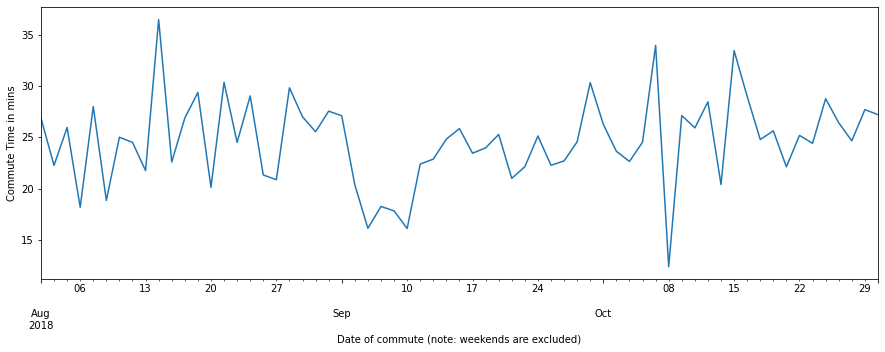

In [7]:
# Visualize the time series 
ax = commute_series.plot(figsize=(15,5))
ax.set_ylabel('Commute Time in mins')
ax.set_xlabel('Date of commute (note: weekends are excluded)');

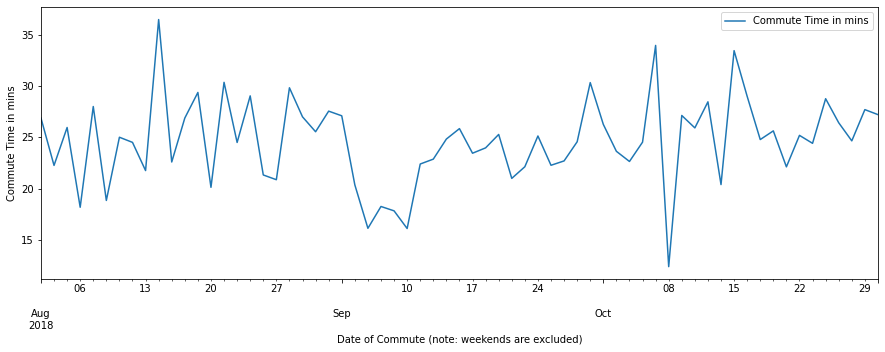

In [8]:
##########
# what if this was a df instead of a series
commute_series_df = pd.DataFrame(commute, index=dates, columns=['Commute Time in mins'])
ax = commute_series_df.plot(figsize=(15,5))
ax.set_ylabel('Commute Time in mins')
ax.set_xlabel('Date of Commute (note: weekends are excluded)');
# when df there is a legend that includes the column name as the lable for the line
##########

Print Nina's shortest and longest commute.

In [9]:
# Shortest commute
commute_series.min()

12.41033391382408

In [10]:
# Longest commute
commute_series.max()

36.487277579955666

Look at the distribution of commute times.

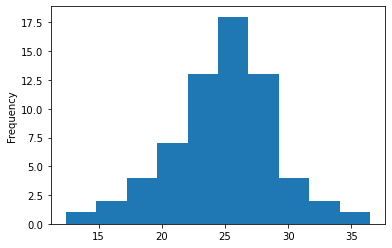

In [11]:
# Distribution of commute times
commute_series.plot(kind='hist');

Compute the mean and standard deviation of `commute_series`. The fact that the mean and standard error are constant over time is crucial!

In [12]:
# Mean of commute_series
commute_series.mean()

24.629331839058004

In [13]:
# Standard deviation of commute_series
commute_series.std()

4.281096000402472

Now, let's look at the mean and standard deviation for August and October.  

In [14]:
# Mean and standard deviation for August and October

In [15]:
# August
aug = commute_series['2018-08']
aug

2018-08-01    26.891943
2018-08-02    22.274296
2018-08-03    25.969758
2018-08-06    18.197057
2018-08-07    28.012571
2018-08-08    18.861115
2018-08-09    25.020508
2018-08-10    24.519089
2018-08-13    21.772072
2018-08-14    36.487278
2018-08-15    22.608708
2018-08-16    26.889828
2018-08-17    29.383824
2018-08-20    20.139325
2018-08-21    30.369425
2018-08-22    24.511401
2018-08-23    29.050062
2018-08-24    21.344523
2018-08-27    20.881879
2018-08-28    29.839186
2018-08-29    27.007489
2018-08-30    25.555385
2018-08-31    27.563044
Freq: B, dtype: float64

In [16]:
print(f"""
AUGUST
Mean: {aug.mean()}
Standard Deviation: {aug.std()}
""")


AUGUST
Mean: 25.35433780425335
Standard Deviation: 4.300977315435741



In [17]:
# October
octo = commute_series['2018-10']
octo

2018-10-01    26.274661
2018-10-02    23.649619
2018-10-03    22.658927
2018-10-04    24.540320
2018-10-05    33.967271
2018-10-08    12.410334
2018-10-09    27.140544
2018-10-10    25.929962
2018-10-11    28.470448
2018-10-12    20.407149
2018-10-15    33.457377
2018-10-16    29.003771
2018-10-17    24.794340
2018-10-18    25.639151
2018-10-19    22.134946
2018-10-22    25.202091
2018-10-23    24.426650
2018-10-24    28.774302
2018-10-25    26.430577
2018-10-26    24.666203
2018-10-29    27.711224
2018-10-30    27.224241
Freq: B, dtype: float64

In [18]:
print(f"""
OCTOBER
Mean: {octo.mean()}
Standard Deviation: {octo.std()}
""")


OCTOBER
Mean: 25.677914014895
Standard Deviation: 4.374243108899012



Because you've generated this data, you know that the mean and standard deviation will be the same over time. However, comparing mean and standard deviation over time is useful practice for real data examples to check if a process is white noise!

## A Random Walk model 

Recall that a random walk model has: 

- No specified mean or variance 
- A strong dependence over time 

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model: 

Starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) on January 1 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard deviation of 10.

In [19]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range(start='2010-01-01', end='2010-11-30', freq="B")

# White noise error term
error = np.random.normal(0,10,len(dates))

# Define random walk
def random_walk(start, error):        
    return start + (np.cumsum(error))

shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

Visualize the time series with correct axis labels. 

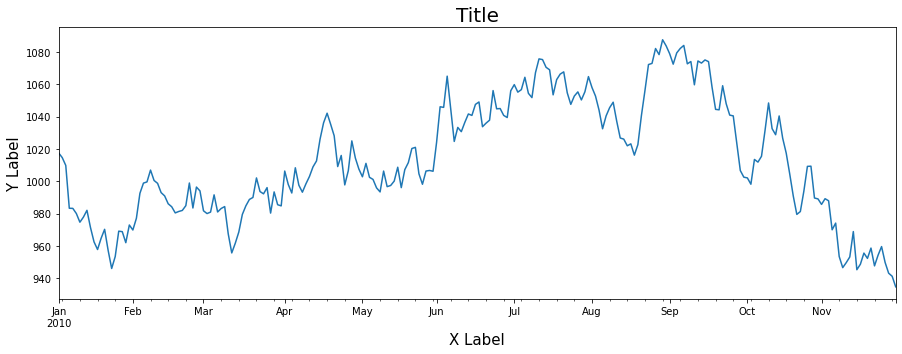

In [20]:
# Your code here
ax = shares_series.plot(figsize=(15,5))
ax.set_ylabel('Y Label', size=15)
ax.set_xlabel('X Label', size=15)
ax.set_title('Title', fontsize=20);

You can see how this very much looks like the exchange rate series you looked at in the lesson!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [21]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range(start='2010-01-01', end='2010-11-30', freq="B")

# White noise error term
error = np.random.normal(0,10,len(dates))

# Define random walk with drift
def drift_random_walk(start, error, drift):        
    return start + (np.cumsum(error+drift))

share_values = drift_random_walk(1000, error, 8)

shares_series_drift = pd.Series(share_values, index=dates)

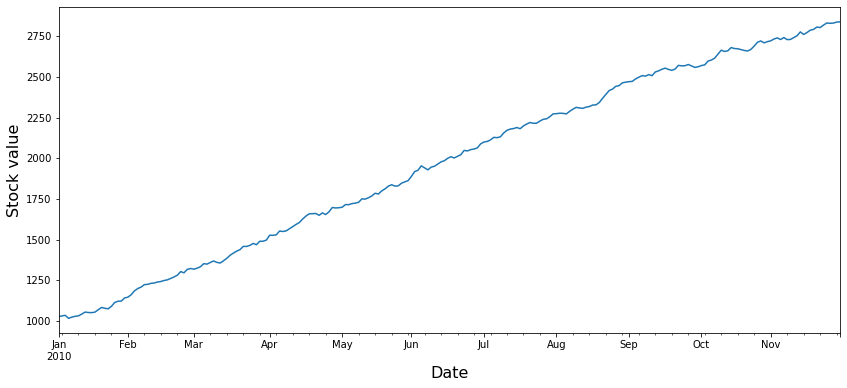

In [22]:
ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show();

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the random walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series (time period of 1) for the shares time series (no drift).

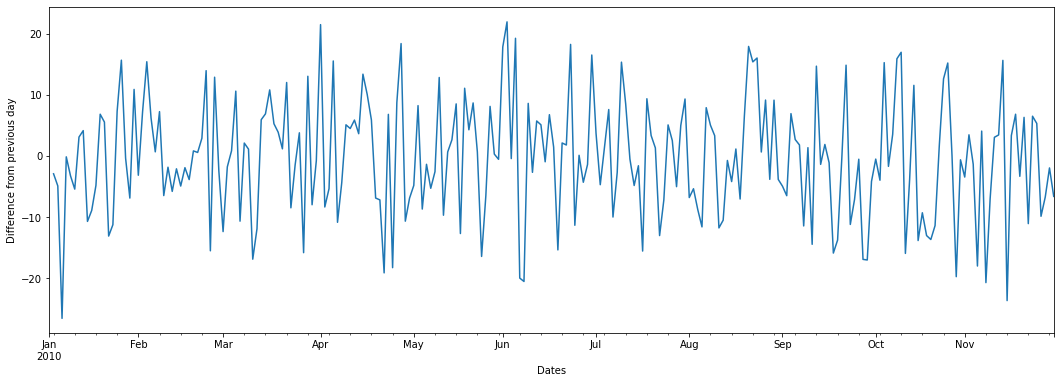

In [23]:
# Your code here
shares_diff = shares_series.diff(periods=1)

ax = shares_diff.plot(figsize=(18,6))
ax.set_xlabel("Dates")
ax.set_ylabel("Difference from previous day");

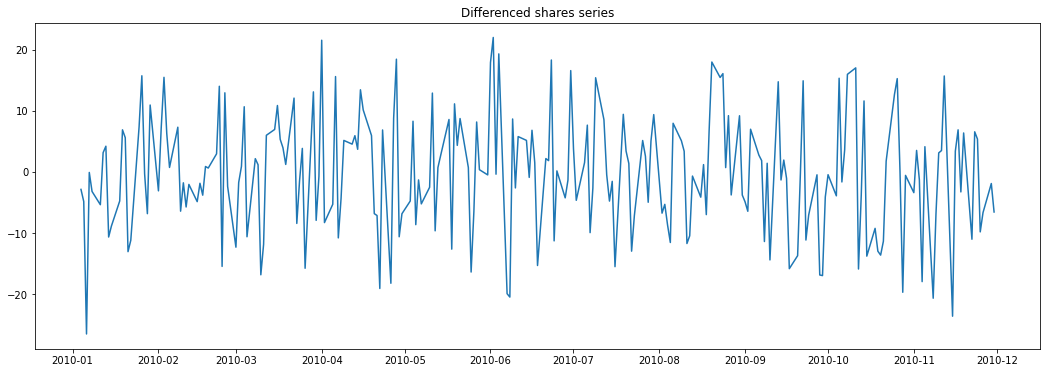

In [24]:
# SB format 
fig = plt.figure(figsize=(18,6))
plt.plot(shares_diff)
plt.title('Differenced shares series')
plt.show(block=False)

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

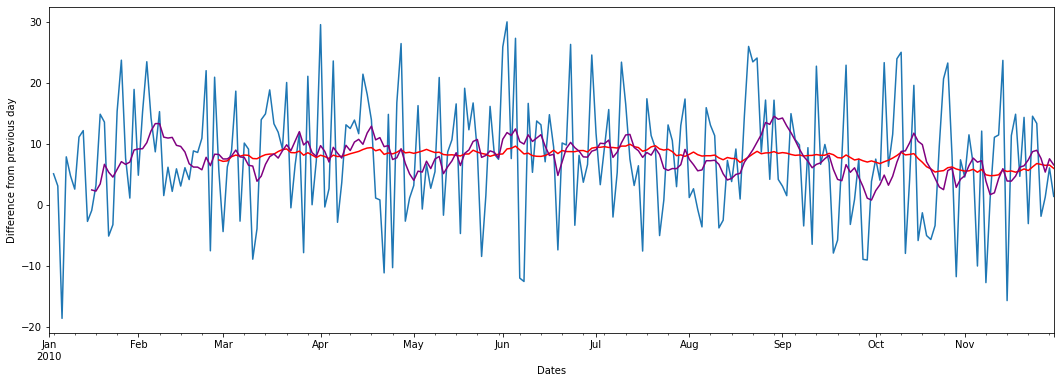

In [25]:
# Your code here 
shares_diff = shares_series_drift.diff(periods=1)

ax = shares_diff.plot(figsize=(18,6))
shares_diff.rolling(window=40, center=False).mean().plot(figsize=(18,6), color='red')
#shares_diff.rolling(window=20, center=False).mean().plot(figsize=(18,6), color='orange')
shares_diff.rolling(window=10, center=False).mean().plot(figsize=(18,6), color='purple')
#shares_diff.rolling(window=5, center=False).mean().plot(figsize=(18,6), color='green')
ax.set_xlabel("Dates")
ax.set_ylabel("Difference from previous day");

In [26]:
shares_diff.rolling(window=5, center=False).mean().mean()

7.759352735846077

In [27]:
shares_diff.rolling(window=10, center=False).mean().mean()

7.82543677379142

In [28]:
shares_diff.rolling(window=20, center=False).mean().mean()

7.905470548863475

In [29]:
shares_diff.mean()

7.650151578845474

This is also a white noise series, but what can you tell about the mean? 

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how white noise and random walk models work!